<a href="https://colab.research.google.com/github/Alisonia/Food-delivery-prediction/blob/main/predictfooddemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML: Predicting food demand in a meal delivery service**

## Data Preparation

In [ ]:
# Loading the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
from google.colab import files
uploaded = files.upload()

Saving fulfilment_center_info.csv to fulfilment_center_info.csv
Saving meal_info.csv to meal_info.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
meal_info=pd.read_csv(io.BytesIO(uploaded['meal_info.csv']))
fulfilment_center_info=pd.read_csv(io.BytesIO(uploaded['fulfilment_center_info.csv']))

train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
#merging the data to create a unified dataset
train_merged=train.merge(meal_info,on='meal_id',how='left')
train_merged=train_merged.merge(fulfilment_center_info,on='center_id',how='left')

test_merged=test.merge(meal_info,on='meal_id',how='left')
test_merged=test_merged.merge(fulfilment_center_info,on='center_id',how='left')

In [ ]:
train_merged.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [ ]:
train_merged.shape

(456548, 15)

In [ ]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [ ]:
#Handling missing value
train_merged.isnull().sum()   #no missing values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [ ]:
#dropping city_code, region_code, and op_area, id, meal_id, and center_id
train_merged=train_merged.drop(['city_code','region_code','op_area','id','meal_id','center_id'],axis=1)
test_merged=test_merged.drop(['city_code','region_code','op_area','id','meal_id','center_id'],axis=1)

In [ ]:
train_merged.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
0,1,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C
1,1,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C
2,1,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C
3,1,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C
4,1,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C


## Exploratory Data Analysis (EDA)

### EDA: Univariate (numerical variables)

Text(0, 0.5, 'Number of Orders')

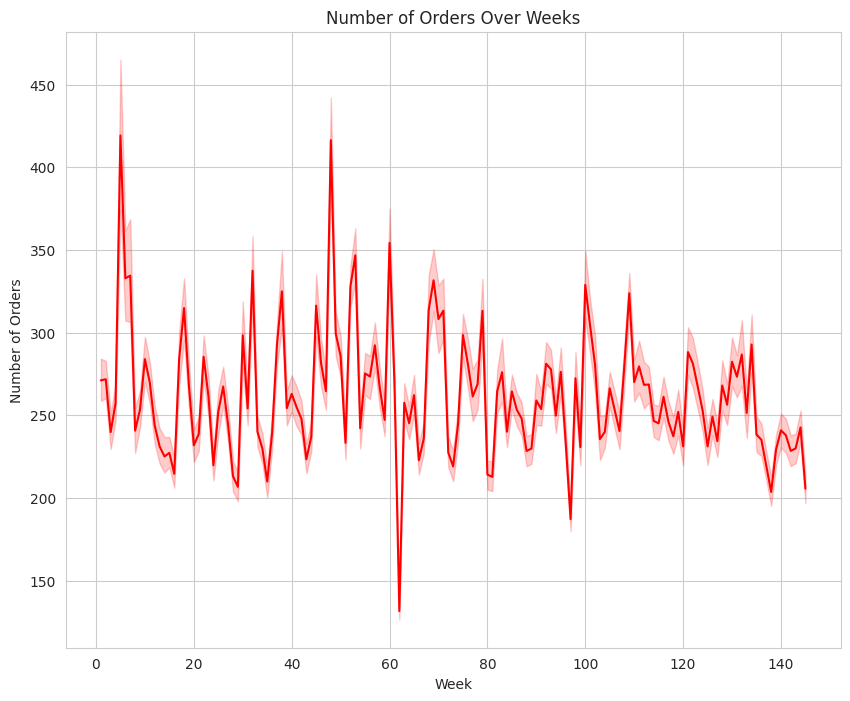

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='week', y='num_orders', data=train_merged, color='red')
plt.title('Number of Orders Over Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

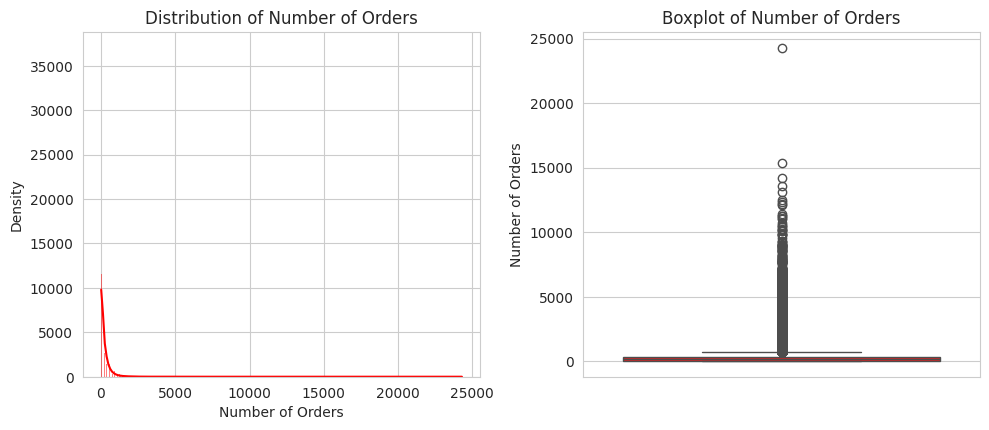

In [ ]:
# Distplot and Boxplot: num_orders
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(train_merged['num_orders'], kde=True, color='red')
plt.title('Distribution of Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.boxplot(y='num_orders', data=train_merged, color='red')
plt.title('Boxplot of Number of Orders')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

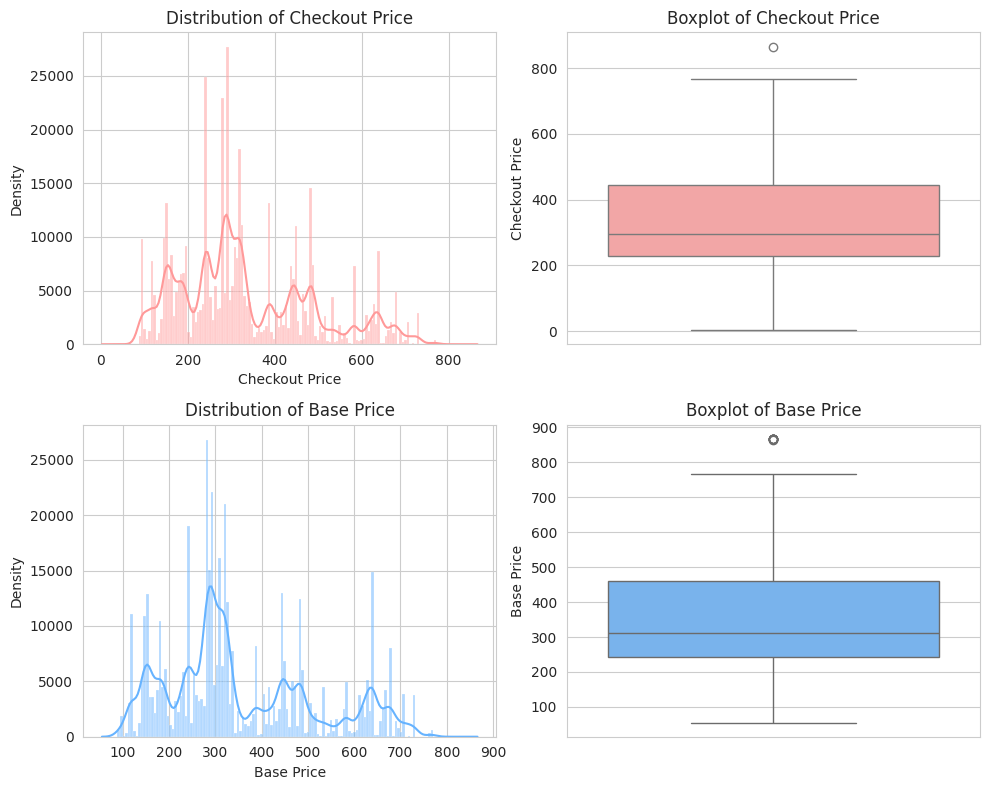

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))

# Distplot and Boxplot: checkout_price
plt.subplot(2, 2, 1)
sns.histplot(train_merged['checkout_price'], kde=True, color='#ff9999')
plt.title('Distribution of Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.boxplot(y='checkout_price', data=train_merged, color='#ff9999')
plt.title('Boxplot of Checkout Price')
plt.ylabel('Checkout Price')

# Distplot and Boxplot: base_price
plt.subplot(2, 2, 3)
sns.histplot(train_merged['base_price'], kde=True, color='#66b3ff')
plt.title('Distribution of Base Price')
plt.xlabel('Base Price')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.boxplot(y='base_price', data=train_merged, color='#66b3ff')
plt.title('Boxplot of Base Price')
plt.ylabel('Base Price')

plt.tight_layout()
plt.show()

### EDA Univariate (Categorical Variables)

<ipython-input-55-8a03314c21b4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_merged, x='category', ax=axes[1, 0], palette='viridis')
<ipython-input-55-8a03314c21b4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_merged, x='cuisine', ax=axes[1, 1], palette='viridis')
<ipython-input-55-8a03314c21b4>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_merged, x='center_type', ax=axes[1, 2], palette='viridis')


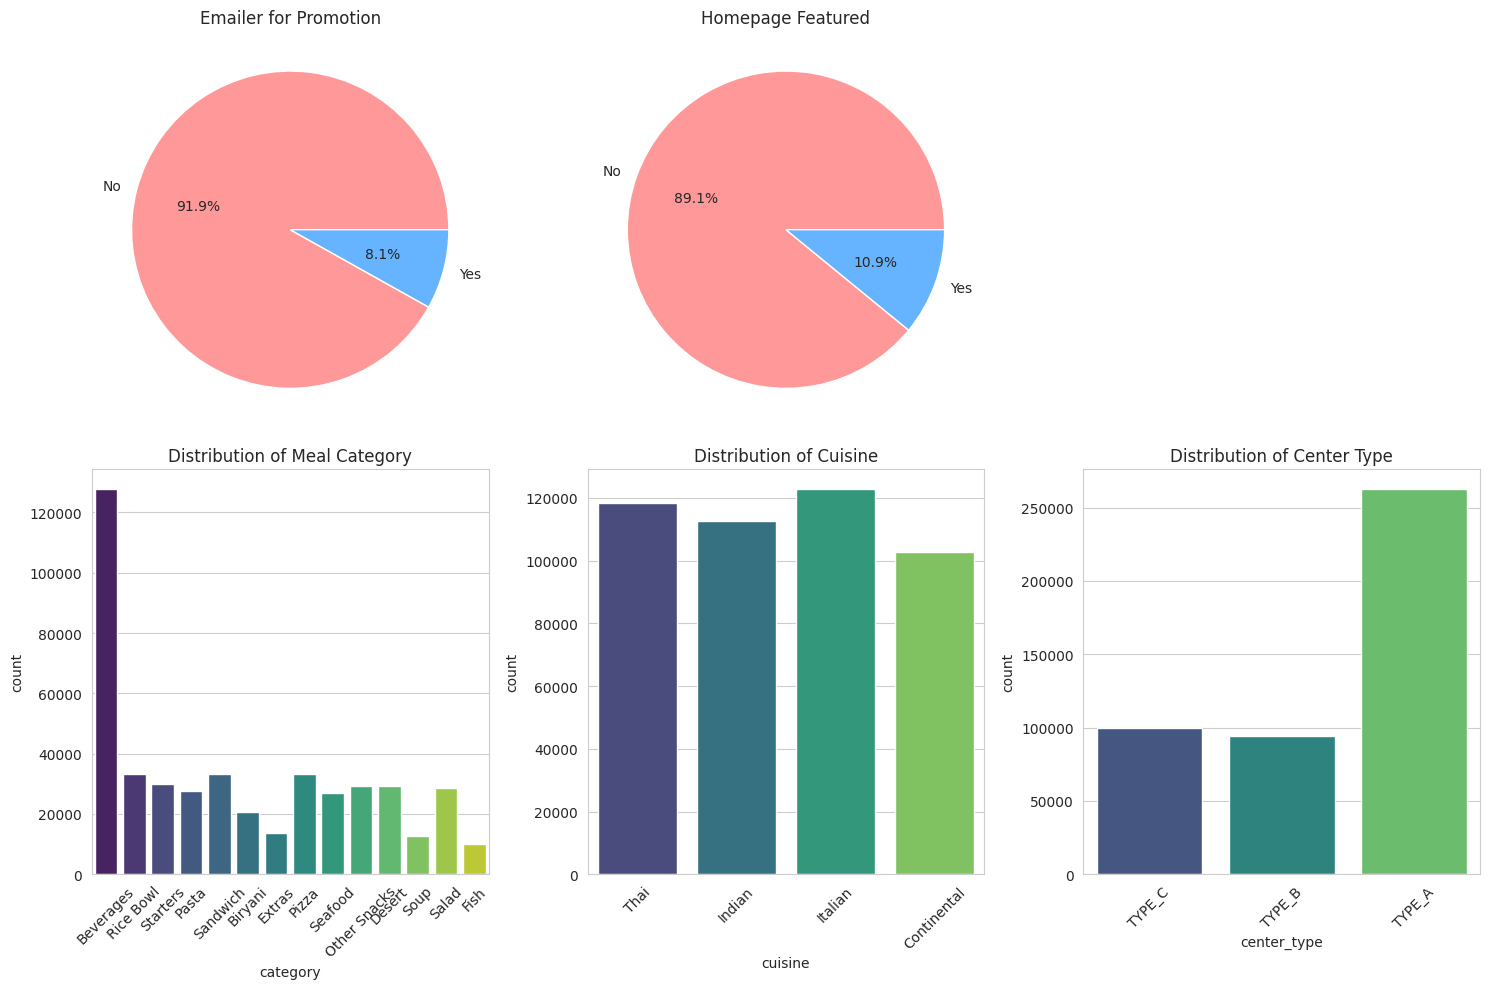

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Pie chart for emailer_for_promotion
emailer_counts = train_merged['emailer_for_promotion'].value_counts()
axes[0, 0].pie(emailer_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[0, 0].set_title('Emailer for Promotion')

# Pie chart for homepage_featured
homepage_counts = train_merged['homepage_featured'].value_counts()
axes[0, 1].pie(homepage_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axes[0, 1].set_title('Homepage Featured')

# Empty plot (to maintain the grid structure)
axes[0, 2].axis('off')

# Bar chart for category
sns.countplot(data=train_merged, x='category', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribution of Meal Category')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for cuisine
sns.countplot(data=train_merged, x='cuisine', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution of Cuisine')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar chart for center_type
sns.countplot(data=train_merged, x='center_type', ax=axes[1, 2], palette='viridis')
axes[1, 2].set_title('Distribution of Center Type')
axes[1, 2].tick_params(axis='x', rotation=45)

# Adjust the spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


### Bivariate Analysis

In [ ]:
# Select numerical features and the target variable
numerical_features = ['num_orders','checkout_price', 'base_price','week']
correlation_matrix = train_merged[numerical_features].corr()

print(correlation_matrix)

                num_orders  checkout_price  base_price      week
num_orders        1.000000       -0.282108   -0.222306 -0.017210
checkout_price   -0.282108        1.000000    0.953389  0.026581
base_price       -0.222306        0.953389    1.000000  0.028614
week             -0.017210        0.026581    0.028614  1.000000


## Feature Engineering

In [ ]:
#Features Engineering on the Train_merged dataset
#converting '0' or '1' responses to 'No' or 'Yes'
train_merged['homepage_featured'] = train_merged['homepage_featured'].map({0: 'No', 1: 'Yes'})
train_merged['emailer_for_promotion'] = train_merged['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})

#creating new features
train_merged['price_diff'] = train_merged['checkout_price'] - train_merged['base_price']
train_merged['discount_rate'] = (train_merged['base_price'] - train_merged['checkout_price']) / train_merged['base_price']


#Performing the same on test_merged dataset
test_merged['homepage_featured'] = test_merged['homepage_featured'].map({0: 'No', 1: 'Yes'})
test_merged['emailer_for_promotion'] = test_merged['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
test_merged['price_diff'] = test_merged['checkout_price'] - test_merged['base_price']
test_merged['discount_rate'] = (test_merged['base_price'] - test_merged['checkout_price']) / test_merged['base_price']

In [ ]:
#dropping outliers from train-merged
Q1 = train_merged['num_orders'].quantile(0.25)
Q3 = train_merged['num_orders'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_merged_no_outliers = train_merged[(train_merged['num_orders'] >= lower_bound) & (train_merged['num_orders'] <= upper_bound)]
train_merged_no_outliers.shape

(423611, 11)

In [ ]:
#Dropping category (too many responses and can introduce high dimensional matrix) from the features
train_merged_no_outliers=train_merged_no_outliers.drop('category',axis=1) #this was done before encoding and scaling.
train_merged_no_outliers.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,cuisine,center_type,price_diff,discount_rate
0,1,136.83,152.29,No,No,177,Thai,TYPE_C,-15.46,0.101517
1,1,136.83,135.83,No,No,270,Thai,TYPE_C,1.00,-0.007362
2,1,134.86,135.86,No,No,189,Thai,TYPE_C,-1.00,0.007361
3,1,339.50,437.53,No,No,54,Indian,TYPE_C,-98.03,0.224053
4,1,243.50,242.50,No,No,40,Indian,TYPE_C,1.00,-0.004124


In [ ]:
test_merged=test_merged.drop(['category'],axis=1)
test_merged.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,center_type,price_diff,discount_rate
0,146,158.11,159.11,No,No,Thai,TYPE_C,-1.0,0.006285
1,146,160.11,159.11,No,No,Thai,TYPE_C,1.0,-0.006285
2,146,157.14,159.14,No,No,Thai,TYPE_C,-2.0,0.012568
3,146,162.02,162.02,No,No,Indian,TYPE_C,0.0,0.000000
4,146,163.93,163.93,No,No,Indian,TYPE_C,0.0,0.000000


In [ ]:
#One-hot encoding for the categorical variables.
train_merged_no_outliers = pd.get_dummies(train_merged_no_outliers, columns=['emailer_for_promotion','homepage_featured','cuisine', 'center_type'], drop_first=True)
test_merged = pd.get_dummies(test_merged, columns=['emailer_for_promotion','homepage_featured','cuisine', 'center_type'], drop_first=True)

In [ ]:
# Apply log transformation to num_orders to reduce skewness
train_merged_no_outliers['num_orders'] = np.log1p(train_merged_no_outliers['num_orders'])  # log1p to handle log(0)

from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = ['checkout_price', 'base_price', 'num_orders','price_diff','discount_rate']
scaler = StandardScaler()
train_merged_no_outliers[numerical_features] = scaler.fit_transform(train_merged_no_outliers[numerical_features])

train_merged_no_outliers.head()

,week,checkout_price,base_price,num_orders,price_diff,discount_rate,emailer_for_promotion_Yes,homepage_featured_Yes,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1,-1.325456,-1.294973,0.430012,0.105611,0.450603,False,False,False,False,True,False,True
1,1,-1.325456,-1.397029,0.821289,0.455028,-0.548015,False,False,False,False,True,False,True
2,1,-1.338263,-1.396843,0.490742,0.412572,-0.412981,False,False,False,False,True,False,True
3,1,-0.007878,0.473598,-0.663249,-1.647207,1.574485,False,False,True,False,False,False,True
4,1,-0.631983,-0.735644,-0.936702,0.455028,-0.518313,False,False,True,False,False,False,True


In [ ]:
#Doing the same for test merged data
# Identify numerical features
numerical_features_test = ['checkout_price', 'base_price', 'price_diff','discount_rate'] #excluding num_orders
scaler = StandardScaler()
test_merged[numerical_features_test] = scaler.fit_transform(test_merged[numerical_features_test])

test_merged.head()

,week,checkout_price,base_price,price_diff,discount_rate,emailer_for_promotion_Yes,homepage_featured_Yes,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,146,-1.193987,-1.272230,0.346399,-0.357063,False,False,False,False,True,False,True
1,146,-1.180991,-1.272230,0.397194,-0.477345,False,False,False,False,True,False,True
2,146,-1.200290,-1.272037,0.321002,-0.296944,False,False,False,False,True,False,True
3,146,-1.168579,-1.253474,0.371796,-0.417204,False,False,True,False,False,False,True
4,146,-1.156168,-1.241163,0.371796,-0.417204,False,False,True,False,False,False,True


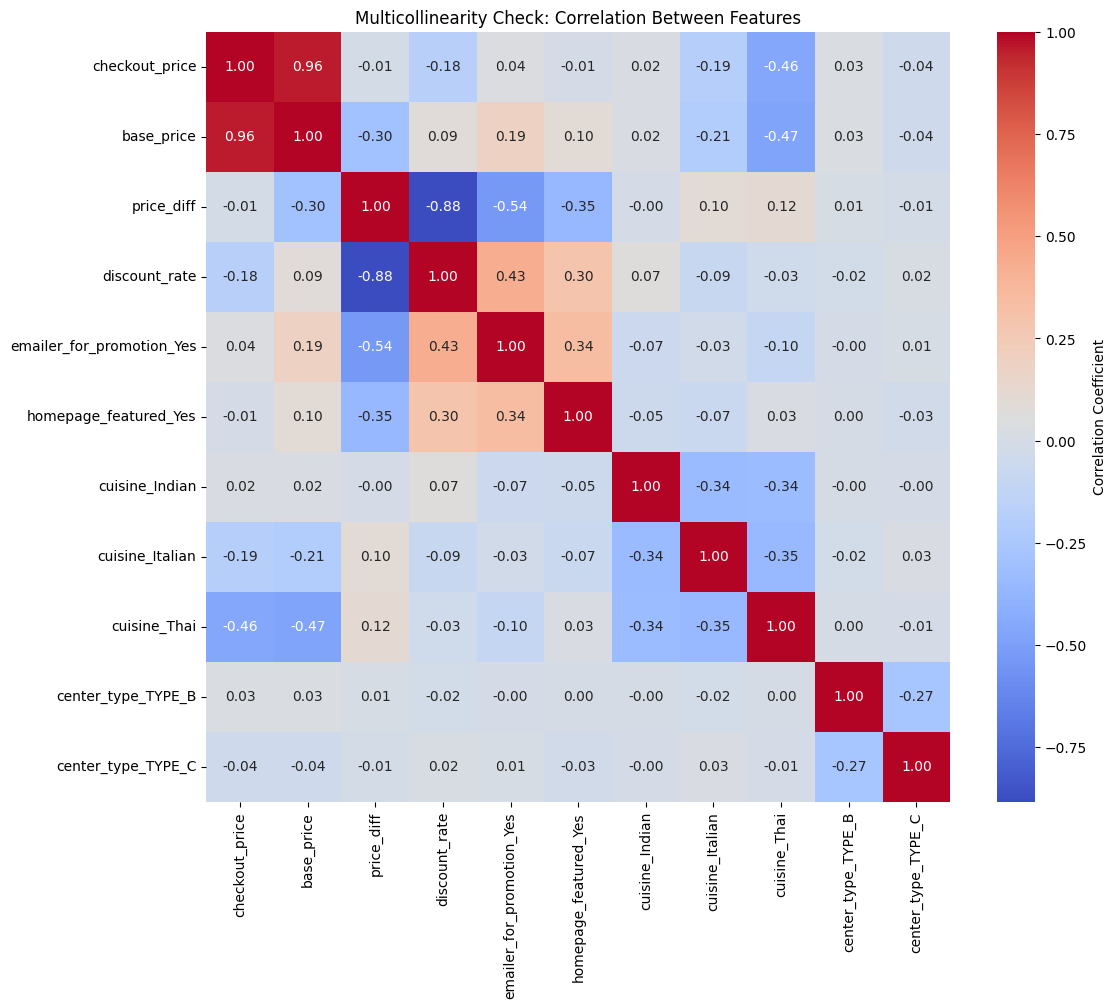

In [ ]:
#Feature selection using Multicollinearity: Heatmap or corr matrix of all features except num_orders
corr_matrix = train_merged_no_outliers.drop(['num_orders','week'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Multicollinearity Check: Correlation Between Features')
plt.show()

In [ ]:
#'checkout_price', AND 'base_price' (r=0.96) |  'discount_rate' AND 'price_diff' (r=-0.88) are highly correlated
#so dropping checkout_price and 'price_diff' from train_merged and test_merged
#train_merged_no_outliers=train_merged_no_outliers.drop(['checkout_price','price_diff'],axis=1)
#test_merged=test_merged.drop(['checkout_price','price_diff'],axis=1)

#print the column of train_merged_no_outliers
print(train_merged_no_outliers.columns)
print("==============================================================================\n")
#print the column of test_merged
print(test_merged.columns)

Index(['week', 'base_price', 'num_orders', 'discount_rate',
       'emailer_for_promotion_Yes', 'homepage_featured_Yes', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Thai', 'center_type_TYPE_B',
       'center_type_TYPE_C'],
      dtype='object')

Index(['week', 'base_price', 'discount_rate', 'emailer_for_promotion_Yes',
       'homepage_featured_Yes', 'cuisine_Indian', 'cuisine_Italian',
       'cuisine_Thai', 'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')


## Model Training and Evaluation

In [ ]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X=train_merged_no_outliers.drop(['num_orders','week'],axis=1)
y=train_merged_no_outliers['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Training and evaluating model using svr, random forest, and gradient boosting
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
models = {
    'Support Vector Regression': SVR(),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

Support Vector Regression - MSE: 0.5999046084594756, RMSE: 0.7745350918192639, MAE: 0.5988672162042882, R2: 0.39972049636136175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 338888, number of used features: 9
[LightGBM] [Info] Start training from score 0.001294
LightGBM - MSE: 0.48167374245582995, RMSE: 0.6940271914383686, MAE: 0.5450033289087659, R2: 0.5180252477478965
XGBoost - MSE: 0.46500709350166797, RMSE: 0.681914286037232, MAE: 0.5327551744652347, R2: 0.5347023121018697


## Model Comparison and Selection

In [ ]:
# Evaluation metrics
mse_svr, rmse_svr, mae_svr, r2_svr = 0.599, 0.775, 0.599, 0.400
mse_lgbm, rmse_lgbm, mae_lgbm, r2_lgbm = 0.482, 0.694, 0.545, 0.518
mse_xgb, rmse_xgb, mae_xgb, r2_xgb = 0.465, 0.682, 0.533, 0.535

metrics = {
    "Support Vector Regression": {"MSE": mse_svr, "RMSE": rmse_svr, "MAE": mae_svr, "R2": r2_svr},
    "LightGBM": {"MSE": mse_lgbm, "RMSE": rmse_lgbm, "MAE": mae_lgbm, "R2": r2_lgbm},
    "XGBoost": {"MSE": mse_xgb, "RMSE": rmse_xgb, "MAE": mae_xgb, "R2": r2_xgb}
}

# Create DataFrame from metrics dictionary
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = "Model"  # Set the index name
metrics_df.reset_index(inplace=True)  # Reset the index to make 'Model' a column again

#melt the dataframe for easier ploting with seaborn
metrics_df = pd.melt(metrics_df, id_vars=['Model'], var_name='Metric', value_name='Value')

metrics_df

,Model,Metric,Value
0,Support Vector Regression,MSE,0.599
1,LightGBM,MSE,0.482
2,XGBoost,MSE,0.465
3,Support Vector Regression,RMSE,0.775
4,LightGBM,RMSE,0.694
5,XGBoost,RMSE,0.682
6,Support Vector Regression,MAE,0.599
7,LightGBM,MAE,0.545
8,XGBoost,MAE,0.533
9,Support Vector Regression,R2,0.400


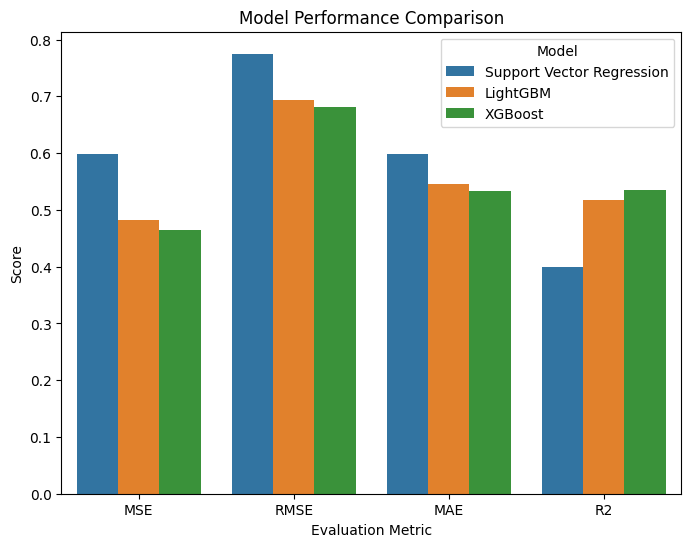

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=metrics_df, x="Metric", y="Value", hue="Model")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Evaluation Metric")
plt.legend(title="Model")

plt.show()  #Best model is XGBoost

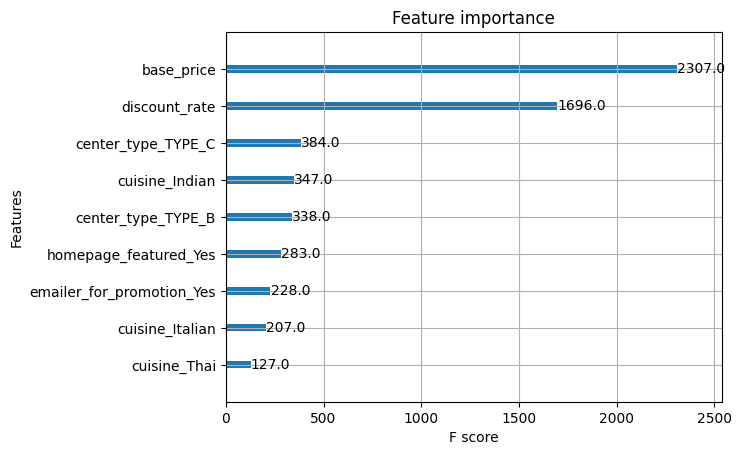

In [ ]:
#Draw the feature importance using XGBoost
from xgboost import XGBRegressor as xgb
from xgboost import plot_importance

#fitting the xgb model and plotting feature importance
model = xgb()
model.fit(X_train, y_train)
plot_importance(model, importance_type="weight")
plt.show()

## Predictions Using the Best Model

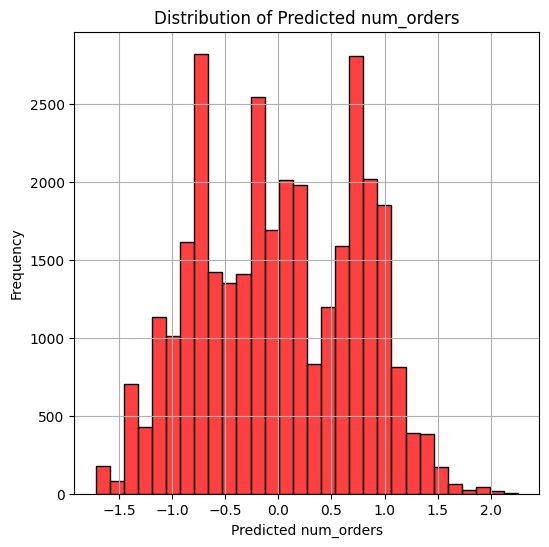

In [ ]:
#Prediction of the model on the test_merged
#model = xgb()
#model.fit(X_train, y_train)

predictions = model.predict(test_merged.drop('week', axis=1))

plt.figure(figsize=(6, 6))
sns.histplot(predictions, bins=30, kde=False, color='red')
plt.title('Distribution of Predicted num_orders')
plt.xlabel('Predicted num_orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Insight

The feature importance analysis using the XGBoost model highlighted several key features that significantly impact the prediction of food demand in a meal delivery service. The most important features identified were base price, discount price, center_type_C, cuisine_Indian, and center_type_B. Here is a discussion on the insights derived using the most importance features.

**Base Price:**
The base price of the meal emerged as the most important feature in predicting food demand. This indicates that the original price of a meal significantly influences customer ordering behavior. Generally, meals with competitive base prices are likely to attract more orders, as customers tend to be price-sensitive, especially in a competitive market. Understanding the optimal pricing strategy can help the meal delivery service maximize demand while maintaining profitability.

**Discount Price:**
The discount price, or the reduced price offered to customers, is the second most important feature. This highlights the effectiveness of promotions and discounts in driving demand. Discounts can incentivize customers to order more frequently or in larger quantities. This feature's importance suggests that dynamic pricing strategies and targeted promotions can be crucial for boosting sales and managing inventory more efficiently.

**Center Type (Center_Type_C and Center_Type_B):**
Different fulfillment centers may have varying capabilities, locations, and operational efficiencies. The importance of center_type_C and center_type_B indicates that the type of center fulfilling the order has a significant impact on the number of orders. Factors such as delivery speed, service quality, and logistical efficiency associated with specific center types can influence customer satisfaction and repeat orders. This insight can help the service optimize its center operations and improve overall service delivery.

**Cuisine (Cuisine_Indian):**
The cuisine type, particularly Indian cuisine, also plays a vital role in predicting food demand. This suggests that certain cuisines have higher popularity or preference among customers. Indian cuisine's importance could be attributed to its widespread appeal and cultural significance in the target market. Understanding cuisine preferences allows the meal delivery service to tailor its menu offerings to meet customer demand more effectively.

## Conclusion

The feature importance analysis using XGBoost provides valuable insights into the factors that significantly influence food demand in a meal delivery service. Pricing strategies, fulfillment center operations, and menu offerings based on cuisine preferences are critical areas that impact customer ordering behavior. By focusing on these key features, the meal delivery service can optimize its operations, enhance customer satisfaction, and ultimately increase the number of orders.

[Alisonia StatGuide](https://www.linkedin.com/in/adebiyiali/) <br />
[Ali Adebiyi](alisoniastatguide@gmail.com)